Pretax Income ranging from 75000 to 345000
Avg approx error is 0.0038
Polynomial terms are [-4.94658938e-07  8.94934191e-01]


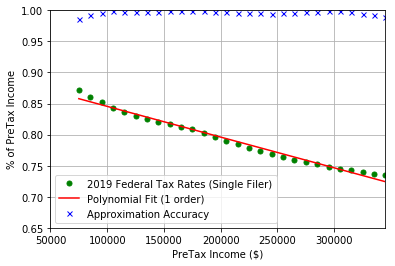

Starting sim for Home Ownership (Single/NonCA)+100000 @ 1.07+/-0.05 for 25 yrs ... Finished in 1.6 seconds
Starting sim for Renting Model (Single/CA)+100000 @ 1.07+/-0.05 for 25 yrs ... Finished in 1.6 seconds


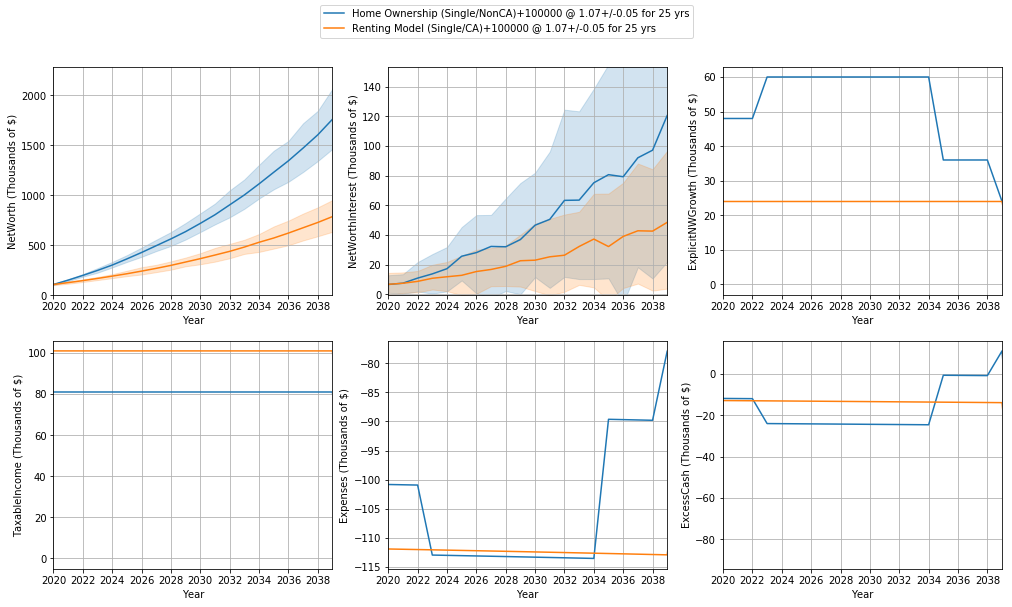

In [3]:
import scipy.optimize
import matplotlib.pyplot as plt
import numpy as np
import glfinancial as glf

pretax_income = np.arange(75 * 1000, 350 * 1000, 10 * 1000)
posttax_income = glf.posttax(pretax_income)
posttax_income_as_percent = posttax_income/pretax_income
polyfit_order = 1
approx_percent_polynom = np.poly1d(np.polyfit(pretax_income, posttax_income/pretax_income, polyfit_order))
approx_percent = approx_percent_polynom(pretax_income)
approximation_error = [abs(x-y) for x, y  in zip(approx_percent, posttax_income_as_percent)]
avg_approx_error = np.average(approximation_error)
approximation_accuracy = [1-x for x in approximation_error]

print('Pretax Income ranging from {} to {}'.format(pretax_income[0], pretax_income[-1]))
print('Avg approx error is {:.2}'.format(avg_approx_error))
print('Polynomial terms are {}'.format(np.asarray(approx_percent_polynom)))

fig, ax = plt.subplots()
plt.plot(pretax_income, posttax_income_as_percent, 'og', ms=5, label='2019 Federal Tax Rates (Single Filer)')
plt.plot(pretax_income, approx_percent, '-r', ms=5, label='Polynomial Fit ({} order)'.format(polyfit_order))
plt.plot(pretax_income, approximation_accuracy, 'xb', ms=5, label='Approximation Accuracy')
plt.axis([50000,pretax_income[-1],0.65,1])
ax.legend()
ax.set_xlabel('PreTax Income ($)')
ax.set_ylabel('% of PreTax Income')
plt.grid()
plt.show()

fm = glf.FinancialModel(year=2019)

sim_results = [] # We'll append all sim results to this list for one large fm plot at the end
ho_single = glf.CashflowModel('Home Ownership (Single/NonCA)') #Home Ownership Model (as compared to renting, etc)
cm = ho_single
cm.add_yearly(100000, 'Salary', year_end=20, taxable=True)
cm.add_monthly(-2000, 'Pri. Res.', monthly_nw=2000, year_end=15)
cm.add_monthly(-1000, 'Sec. Res.', monthly_nw=1000, year_start=4, year_end=19)
cm.add_monthly(-400, 'Auto Costs', yearly_apr=1.01) # Two vehicles - car and truck, one as a 'beater'
cm.add_yearly(-19000, '401k Savings', yearly_nw=19000, year_end=25, taxable=True)
cm.add_yearly(-5000, 'IRA Savings', yearly_nw=5000, year_end=25)
cm.add_monthly(-3000, 'Monthly Spend')
cm.add_yearly(-12000, 'Yearly Spend')


renting_single = glf.CashflowModel('Renting Model (Single/CA)', state_tax=glf.ca_tax_rates)
cm = renting_single
cm.add_yearly(120000, 'Salary', year_end=20, taxable=True)
cm.add_monthly(-2500, 'Primary Residence', monthly_nw=0)
cm.add_monthly(-400, 'Auto Costs', yearly_apr=1.01)
cm.add_yearly(-19000, '401k Savings', yearly_nw=19000, year_end=20, taxable=True)
cm.add_yearly(-5000, 'IRA Savings', yearly_nw=5000, year_end=20)
cm.add_monthly(-3300, 'Monthly Spend') # CA is expensive
cm.add_yearly(-13500, 'Yearly Spend') # CA is expensive

sims_to_run = [ho_single, renting_single]
sim_results = []

for sim in sims_to_run:
    sim_results.append(fm.sim(sim, nyears=25, initial_nw=100000, nw_apr_avg=1.07, nw_apr_stdev=0.05))
# The default suffix is just standard deviation. The :0.80 suffix gives me the 10th and 90th percentile bars on plots
fm.plot(sim_results, suffix=':0.80')



In [17]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def run_sims(nyears=25, initial_nw=600000, nw_apr_avg=1.06):
    sim_results = []
    for sim in sims_to_run:
        sim_results.append(fm.sim(sim, nyears=nyears, initial_nw=initial_nw, nw_apr_avg=nw_apr_avg, nw_apr_stdev=0.05))
    # The default suffix is just standard deviation. The :0.80 suffix gives me the 10th and 90th percentile bars on plots
    fm.plot(sim_results, suffix=':0.80')


In [21]:
interact_manual(run_sims, 
                nyears=widgets.IntSlider(min=5, max=50, step=5, value=25), 
                initial_nw=widgets.IntSlider(min=0, max=1000*1000, step=50*1000, value=600*1000), 
                nw_apr_avg=widgets.FloatSlider(min=0.9, max=1.2, step=0.02, value=1.06))

interactive(children=(IntSlider(value=25, description='nyears', max=50, min=5, step=5), IntSlider(value=600000…

<function __main__.run_sims(nyears=25, initial_nw=600000, nw_apr_avg=1.06)>